In [18]:
!jt -r


Reset css and font defaults in:
C:\Users\huyas\.jupyter\custom &
C:\Users\huyas\AppData\Roaming\jupyter\nbextensions


### 1- loading and displaying the dataset

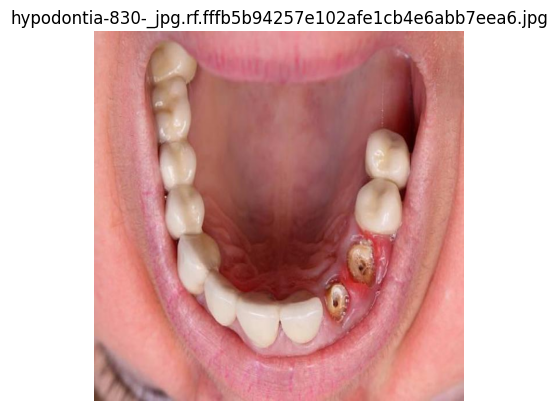

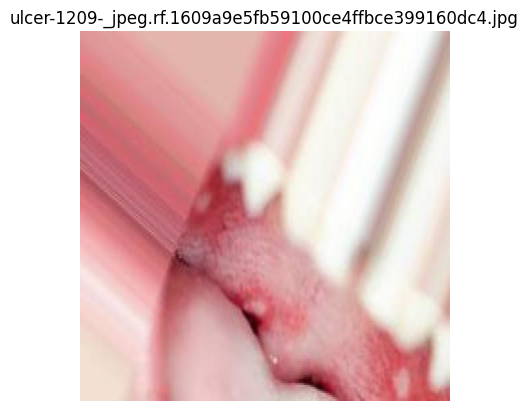

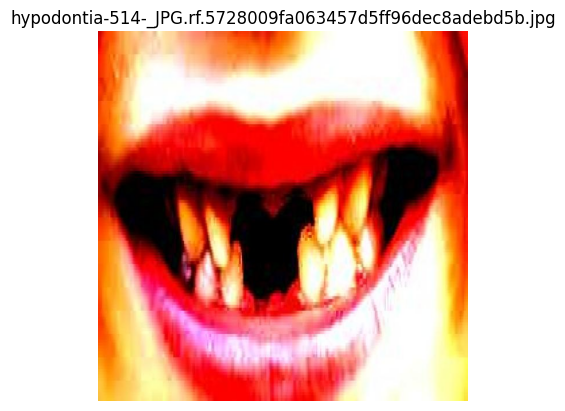

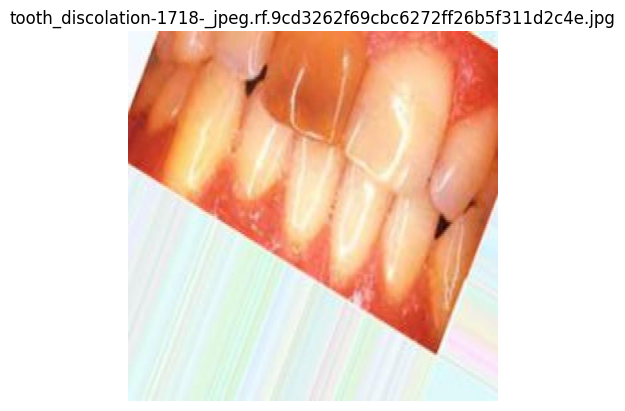

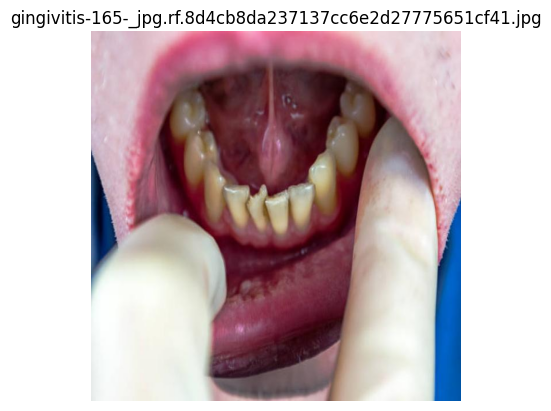

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import random

image_folder = r"C:\Users\huyas\oral-diseases-2\train\images"

# Get 5 random images
sample_images = random.sample(os.listdir(image_folder), 5)

for img_name in sample_images:
    img_path = os.path.join(image_folder, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)  # Display the image
    plt.title(img_name)
    plt.axis("off")
    plt.show()




- loading the pretrained model

In [3]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")
print("YOLOv8 is ready!")



YOLOv8 is ready!


In [3]:
model.info()

YOLOv8n summary: 129 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs


(129, 3157200, 0, 8.8575488)

- train the model 

In [ ]:
model.train(
    data=r"C:\Users\huyas\oral-diseases-2\data.yaml",
    epochs=25,
    imgsz=512,
    batch=4,
    workers=0,  
    device="cuda"
)


New https://pypi.org/project/ultralytics/8.3.86 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.79  Python-3.11.5 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:\Users\huyas\oral-diseases-2\data.yaml, epochs=25, time=None, patience=100, batch=4, imgsz=512, save=True, save_period=-1, cache=False, device=cuda, workers=0, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False,

train: Scanning C:\Users\huyas\oral-diseases-2\train\labels.cache... 7000 images, 0 backgrounds, 0 corrupt: 100%|██████


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning C:\Users\huyas\oral-diseases-2\valid\labels.cache... 1500 images, 0 backgrounds, 0 corrupt: 100%|████████


Plotting labels to runs\detect\train10\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)


- It shows decent preformance however the data needs to be balanced 

### Model architecture 

In [3]:
model = YOLO(r"C:\Users\huyas\Desktop\best.pt")  
print(model)


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [4]:
model.info()

Model summary: 129 layers, 3,012,018 parameters, 0 gradients, 8.2 GFLOPs


(129, 3012018, 0, 8.1995264)

Total images: 7000
Total label files: 7000


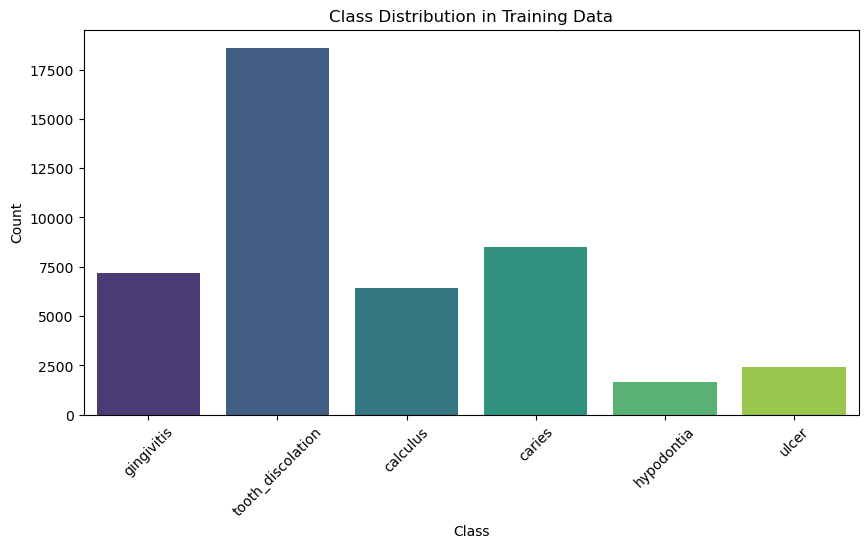

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yaml

# Path to dataset labels
labels_folder = r"C:\Users\huyas\oral-diseases-2\train\labels"

# Get all label files
label_files = [f for f in os.listdir(labels_folder) if f.endswith(".txt")]

# Count total images and labels
print(f"Total images: {len(os.listdir(image_folder))}")
print(f"Total label files: {len(label_files)}")

# Read class names from data.yaml
yaml_path = r"C:\Users\huyas\oral-diseases-2\data.yaml"
with open(yaml_path, "r") as f:
    data_config = yaml.safe_load(f)
class_names = data_config["names"]

# Count instances per class
label_counts = {}

for label_file in label_files:
    file_path = os.path.join(labels_folder, label_file)
    
    with open(file_path, "r") as f:
        lines = f.readlines()
        
    for line in lines:
        class_id = int(line.split()[0])  # First column in YOLO labels is class ID
        label_counts[class_id] = label_counts.get(class_id, 0) + 1

# Convert to DataFrame for visualization
df = pd.DataFrame(list(label_counts.items()), columns=["Class ID", "Count"])
df["Class Name"] = df["Class ID"].map(lambda x: class_names[x])

# Plot class distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=df["Class Name"], y=df["Count"], palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution in Training Data")
plt.show()


In [8]:
df["Percentage"] = (df["Count"] / df["Count"].sum()) * 100
print(df.sort_values("Percentage", ascending=False))


   Class ID  Count         Class Name  Percentage
1         4  18596  tooth_discolation   41.523758
3         1   8485             caries   18.946499
0         2   7200         gingivitis   16.077170
2         0   6412           calculus   14.317613
5         5   2436              ulcer    5.439443
4         3   1655         hypodontia    3.695516


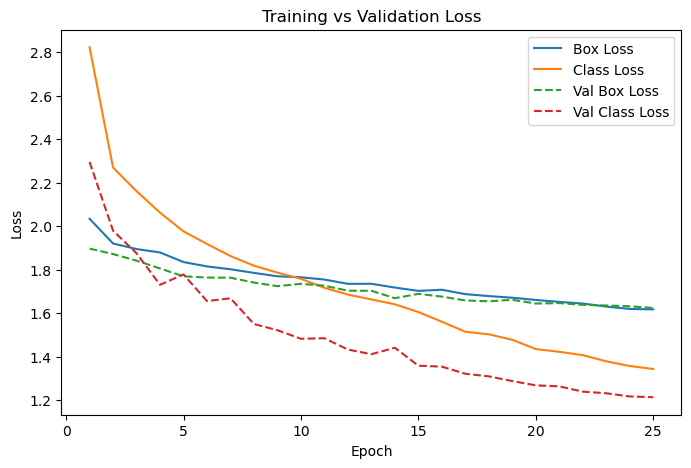

In [9]:
import pandas as pd

log_path = r"runs/detect/train9/results.csv"
df = pd.read_csv(log_path)

plt.figure(figsize=(8, 5))
plt.plot(df["epoch"], df["train/box_loss"], label="Box Loss")
plt.plot(df["epoch"], df["train/cls_loss"], label="Class Loss")
plt.plot(df["epoch"], df["val/box_loss"], label="Val Box Loss", linestyle="dashed")
plt.plot(df["epoch"], df["val/cls_loss"], label="Val Class Loss", linestyle="dashed")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()


### Model evaluation

In [10]:
# Load the trained model
model = YOLO(r"C:\Users\huyas\Desktop\best.pt")

# Run validation on your validation dataset
metrics = model.val()

# Print the evaluation results
print(metrics)


Ultralytics 8.3.79  Python-3.11.5 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
Model summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning C:\Users\huyas\oral-diseases-2\valid\labels.cache... 1500 images, 0 backgrounds, 0 corrupt: 100%|████████
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:16


                   all       1500       9396      0.637      0.619      0.654      0.319
              calculus        315       1294      0.534       0.44      0.467      0.204
                caries        541       1688      0.676      0.692      0.739      0.388
            gingivitis        295       1510      0.602      0.324       0.42      0.167
            hypodontia        199        393      0.599      0.626      0.633      0.234
     tooth_discolation        615       3887       0.67      0.817      0.817      0.506
                 ulcer        279        624       0.74      0.817      0.848      0.414
Speed: 0.3ms preprocess, 2.2ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs\detect\val10
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000021EC8DCB950>
curves: ['Precision-

In [5]:
from ultralytics import YOLO
model = YOLO("runs/detect/train12/weights/best.pt")

In [6]:
model.info()

Model summary: 129 layers, 3,012,018 parameters, 0 gradients, 8.2 GFLOPs


(129, 3012018, 0, 8.1995264)

In [12]:
print(model.tune)

<bound method Model.tune of YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, 

In [5]:
import os
import numpy as np
import shutil
from tqdm import tqdm
from collections import Counter
import albumentations as A

# Define paths
image_folder = r"C:\Users\huyas\oral-diseases-2\train\images"
label_folder = r"C:\Users\huyas\oral-diseases-2\train\labels"
balanced_images = r"C:\Users\huyas\oral-diseases-2\balanced\images"
balanced_labels = r"C:\Users\huyas\oral-diseases-2\balanced\labels"

# Create output directories
os.makedirs(balanced_images, exist_ok=True)
os.makedirs(balanced_labels, exist_ok=True)

In [9]:
# Define your target distribution
target_counts = {
    0: 6000,    # Calculus (keep similar)
    1: 10000,   # Caries (make most common)
    2: 6000,    # Gingivitis (keep similar)
    3: 5000,    # Hypodontia (boost significantly)
    4: 4000,    # Tooth Discoloration (undersample dramatically)
    5: 5000,    # Ulcer (boost)
}

In [10]:
# Map class IDs to names for augmentation selection
class_id_to_name = {
    0: "calculus",
    1: "caries",
    2: "gingivitis", 
    3: "hypodontia",
    4: "tooth_discolation",  # Note: there's a typo in your original code
    5: "ulcer"
}


In [11]:
# Augmentation strategies by class
augmentations = {
    "hypodontia": A.Compose([
        A.HorizontalFlip(p=0.8),
        A.VerticalFlip(p=0.5),
        A.RandomBrightnessContrast(p=0.8),
        A.GaussianBlur(p=0.5),
        A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.2, rotate_limit=20, p=0.8)
    ], bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels'])),
    
    "ulcer": A.Compose([
        A.HorizontalFlip(p=0.7),
        A.VerticalFlip(p=0.3),
        A.HueSaturationValue(p=0.6),
        A.RGBShift(p=0.5),
        A.RandomBrightnessContrast(p=0.6),
        A.GaussianBlur(p=0.4)
    ], bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels'])),
    
    "calculus": A.Compose([
        A.HorizontalFlip(p=0.6),
        A.RandomBrightnessContrast(p=0.5),
        A.CLAHE(p=0.3),
        A.RGBShift(p=0.3)
    ], bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels'])),
    
    "gingivitis": A.Compose([
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.2),
        A.RandomBrightnessContrast(p=0.5),
        A.GaussianBlur(p=0.3),
    ], bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels'])),
    
    "tooth_discolation": A.Compose([
        A.RandomBrightnessContrast(p=0.3),
    ], bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels'])),
    
    "caries": A.Compose([
        A.HorizontalFlip(p=0.5),
        A.RandomBrightnessContrast(p=0.5),
        A.GaussianBlur(p=0.3),
        A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.5)
    ], bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels'])),
}

C:\Users\huyas\anaconda3\Lib\site-packages\albumentations\core\validation.py:87: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
C:\Users\huyas\anaconda3\Lib\site-packages\albumentations\core\composition.py:250: UserWarning: Got processor for bboxes, but no transform to process it.
  self._set_keys()


In [12]:
# First, analyze existing dataset
print("Analyzing existing dataset...")
file_by_class = {i: [] for i in range(6)}  # Dictionary to store filenames by class
unique_images = set()


Analyzing existing dataset...


100%|████████████████████████████████████████████████████████████████████████████| 7000/7000 [00:03<00:00, 2109.99it/s]


Current distribution by dominant class:
Class 0 (calculus): 1887 files
Class 1 (caries): 4998 files
Class 2 (gingivitis): 1968 files
Class 3 (hypodontia): 2130 files
Class 4 (tooth_discolation): 6072 files
Class 5 (ulcer): 3801 files

Balancing dataset...
Undersampled class 4 (tooth_discolation) from 6072 to 4000 files
Copying 1887 original files for class 0 (calculus)


100%|█████████████████████████████████████████████████████████████████████████████| 1887/1887 [00:04<00:00, 448.50it/s]


Copying 4998 original files for class 1 (caries)


100%|█████████████████████████████████████████████████████████████████████████████| 4998/4998 [00:11<00:00, 452.86it/s]


Copying 1968 original files for class 2 (gingivitis)


100%|█████████████████████████████████████████████████████████████████████████████| 1968/1968 [00:04<00:00, 468.18it/s]


Copying 2130 original files for class 3 (hypodontia)


100%|█████████████████████████████████████████████████████████████████████████████| 2130/2130 [00:04<00:00, 490.29it/s]


Copying 4000 original files for class 4 (tooth_discolation)


100%|█████████████████████████████████████████████████████████████████████████████| 4000/4000 [00:09<00:00, 419.91it/s]


Copying 3801 original files for class 5 (ulcer)


100%|█████████████████████████████████████████████████████████████████████████████| 3801/3801 [00:08<00:00, 433.43it/s]


Generating 4113 augmented samples for class 0 (calculus)


 73%|████████████████████████████████████████████████████████▋                     | 1371/1887 [01:10<00:26, 19.38it/s]


Generating 4696 augmented samples for class 1 (caries)


 94%|█████████████████████████████████████████████████████████████████████████▎    | 4696/4998 [01:43<00:06, 45.22it/s]


Generating 3488 augmented samples for class 2 (gingivitis)


 89%|█████████████████████████████████████████████████████████████████████         | 1744/1968 [00:54<00:06, 32.02it/s]


Generating 2600 augmented samples for class 3 (hypodontia)


 61%|███████████████████████████████████████████████▌                              | 1300/2130 [00:52<00:33, 24.76it/s]


Generating 1184 augmented samples for class 5 (ulcer)


 31%|████████████████████████▎                                                     | 1184/3801 [00:30<01:07, 38.56it/s]



Final dataset distribution:
Class 0 (calculus): 115528 instances (Target: 6000)
Class 1 (caries): 96651 instances (Target: 10000)
Class 2 (gingivitis): 118061 instances (Target: 6000)
Class 3 (hypodontia): 23207 instances (Target: 5000)
Class 4 (tooth_discolation): 61922 instances (Target: 4000)
Class 5 (ulcer): 14530 instances (Target: 5000)

Total files in balanced dataset:
Images: 67881
Labels: 67881


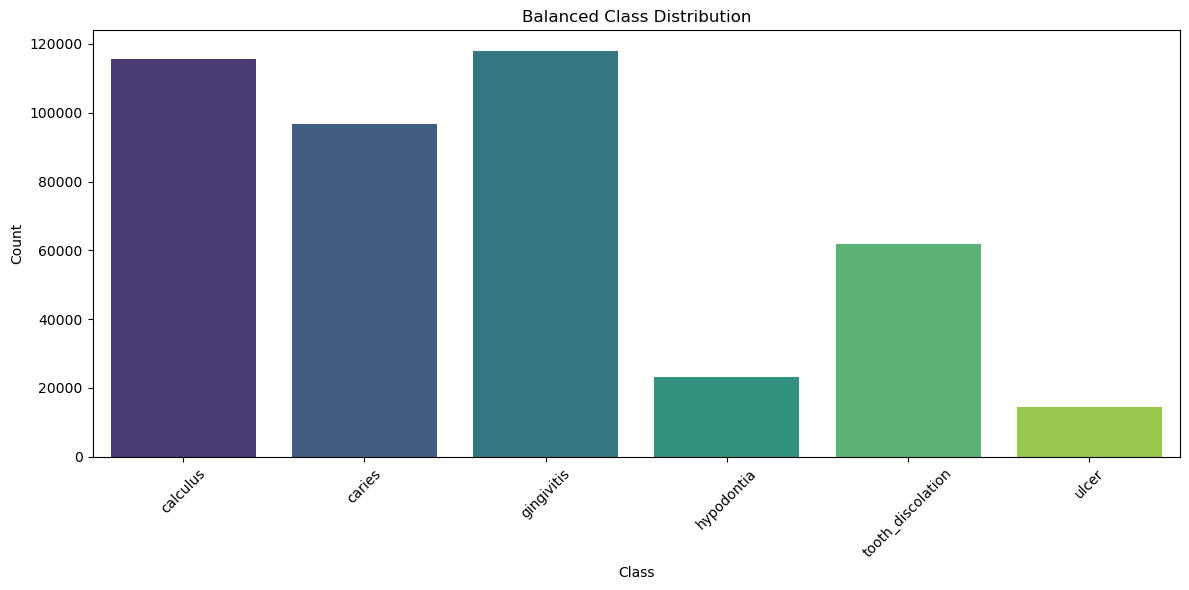

In [18]:

# Group files by their dominant class
for label_file in tqdm(os.listdir(label_folder)):
    if not label_file.endswith(".txt"):
        continue
        
    image_name = os.path.splitext(label_file)[0] + ".jpg"
    if not os.path.exists(os.path.join(image_folder, image_name)):
        continue
        
    with open(os.path.join(label_folder, label_file), "r") as f:
        lines = f.readlines()
    
    # Count instances of each class in this file
    class_counts = Counter()
    for line in lines:
        class_id = int(line.split()[0])
        class_counts[class_id] += 1
    
    # Assign file to the most frequent class
    if class_counts:
        most_common_class = max(class_counts.items(), key=lambda x: x[1])[0]
        file_by_class[most_common_class].append(label_file)
        unique_images.add(os.path.splitext(label_file)[0])
        
print("Current distribution by dominant class:")
for class_id, files in file_by_class.items():
    print(f"Class {class_id} ({class_id_to_name.get(class_id, 'unknown')}): {len(files)} files")

# Balance dataset
print("\nBalancing dataset...")

# For undersampling (tooth discoloration)
undersampled_classes = [4]  # Class IDs to undersample
for class_id in undersampled_classes:
    available = file_by_class[class_id]
    target = target_counts[class_id]
    if len(available) > target:
        # Randomly select a subset
        selected = random.sample(available, target)
        file_by_class[class_id] = selected
        print(f"Undersampled class {class_id} ({class_id_to_name.get(class_id, 'unknown')}) from {len(available)} to {len(selected)} files")

# Process and copy files
processed_counts = {i: 0 for i in range(6)}

# First copy original files (up to target or available count)
for class_id in range(6):
    available = file_by_class[class_id]
    needed = target_counts[class_id]
    
    # Copy original files (all for undersampled classes, up to target for others)
    to_copy = min(len(available), needed)
    
    print(f"Copying {to_copy} original files for class {class_id} ({class_id_to_name.get(class_id, 'unknown')})")
    
    for i in tqdm(range(to_copy)):
        label_filename = available[i]
        image_filename = os.path.splitext(label_filename)[0] + ".jpg"
        
        # Copy label file
        shutil.copy(
            os.path.join(label_folder, label_filename),
            os.path.join(balanced_labels, label_filename)
        )
        
        # Copy image file
        shutil.copy(
            os.path.join(image_folder, image_filename),
            os.path.join(balanced_images, image_filename)
        )
        
        processed_counts[class_id] += 1

# Then augment to reach target counts
for class_id in range(6):
    remaining = target_counts[class_id] - processed_counts[class_id]
    available = file_by_class[class_id]
    
    if remaining <= 0 or not available:
        continue
        
    print(f"Generating {remaining} augmented samples for class {class_id} ({class_id_to_name.get(class_id, 'unknown')})")
    
    aug_transform = augmentations.get(class_id_to_name.get(class_id), None)
    if not aug_transform:
        print(f"Warning: No augmentation defined for class {class_id}")
        continue
    
    # Calculate how many augmentations per original file
    augs_per_file = int(np.ceil(remaining / len(available)))
    
    # Create augmented versions
    augmented_count = 0
    for label_filename in tqdm(available):
        if augmented_count >= remaining:
            break
            
        base_name = os.path.splitext(label_filename)[0]
        image_filename = base_name + ".jpg"
        
        # Read original image and labels
        image = cv2.imread(os.path.join(image_folder, image_filename))
        if image is None:
            continue
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        with open(os.path.join(label_folder, label_filename), "r") as f:
            lines = f.readlines()
            
        # Parse YOLO format bounding boxes
        bboxes = []
        class_labels = []
        
        for line in lines:
            parts = line.strip().split()
            class_id = int(parts[0])
            x_center, y_center, width, height = map(float, parts[1:5])
            bboxes.append([x_center, y_center, width, height])
            class_labels.append(class_id)
            
        # Generate augmentations
        for aug_idx in range(augs_per_file):
            if augmented_count >= remaining:
                break
                
            # Apply augmentation
            try:
                augmented = aug_transform(image=image, bboxes=bboxes, class_labels=class_labels)
                aug_image = augmented['image']
                aug_bboxes = augmented['bboxes']
                aug_labels = augmented['class_labels']
                
                # Save augmented image and labels
                aug_filename = f"{base_name}_aug{augmented_count}.jpg"
                aug_label_filename = f"{base_name}_aug{augmented_count}.txt"
                
                # Save image
                aug_image_rgb = cv2.cvtColor(aug_image, cv2.COLOR_RGB2BGR)
                cv2.imwrite(os.path.join(balanced_images, aug_filename), aug_image_rgb)
                
                # Save labels
                with open(os.path.join(balanced_labels, aug_label_filename), "w") as f:
                    for box_idx in range(len(aug_bboxes)):
                        x, y, w, h = aug_bboxes[box_idx]
                        cls = aug_labels[box_idx]
                        f.write(f"{cls} {x} {y} {w} {h}\n")
                
                augmented_count += 1
                processed_counts[class_id] += 1
            except Exception as e:
                print(f"Error during augmentation: {e}")
                continue

# Final report
print("\nFinal dataset distribution:")
final_counts = {i: 0 for i in range(6)}

for label_file in os.listdir(balanced_labels):
    if not label_file.endswith(".txt"):
        continue
        
    with open(os.path.join(balanced_labels, label_file), "r") as f:
        lines = f.readlines()
    
    for line in lines:
        class_id = int(float(line.split()[0]))
        final_counts[class_id] += 1

for class_id, count in final_counts.items():
    print(f"Class {class_id} ({class_id_to_name.get(class_id, 'unknown')}): {count} instances (Target: {target_counts[class_id]})")

print("\nTotal files in balanced dataset:")
print(f"Images: {len(os.listdir(balanced_images))}")
print(f"Labels: {len(os.listdir(balanced_labels))}")

# Create a visualization of the final distribution
import matplotlib.pyplot as plt
import seaborn as sns

class_names = [class_id_to_name.get(i, f"Class {i}") for i in range(6)]
counts = [final_counts[i] for i in range(6)]

plt.figure(figsize=(12, 6))
sns.barplot(x=class_names, y=counts, palette="viridis")
plt.title("Balanced Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("balanced_distribution.png")
plt.show()

In [10]:
import os
import shutil
import random

# Define paths
dataset_path = r"C:\Users\huyas\oral-diseases-2\balanced"
images_path = os.path.join(dataset_path, "images")
labels_path = os.path.join(dataset_path, "labels")

# Output directories
output_dirs = {
    "train": {
        "images": os.path.join(dataset_path, "train", "images"),
        "labels": os.path.join(dataset_path, "train", "labels"),
    },
    "valid": {
        "images": os.path.join(dataset_path, "valid", "images"),
        "labels": os.path.join(dataset_path, "valid", "labels"),
    },
    "test": {
        "images": os.path.join(dataset_path, "test", "images"),
        "labels": os.path.join(dataset_path, "test", "labels"),
    },
}

# Create directories
for split in output_dirs.values():
    os.makedirs(split["images"], exist_ok=True)
    os.makedirs(split["labels"], exist_ok=True)

# Get list of image files
image_files = [f for f in os.listdir(images_path) if f.endswith((".jpg", ".png", ".jpeg"))]
random.shuffle(image_files)  # Shuffle for randomness

# Split dataset
train_split = int(0.75 * len(image_files))
valid_split = int(0.90 * len(image_files))  # 75% train, 15% valid, 10% test

train_files = image_files[:train_split]
valid_files = image_files[train_split:valid_split]
test_files = image_files[valid_split:]

# Function to move files
def move_files(file_list, split_name):
    for file in file_list:
        img_src = os.path.join(images_path, file)
        label_src = os.path.join(labels_path, file.replace(".jpg", ".txt").replace(".png", ".txt"))

        img_dst = os.path.join(output_dirs[split_name]["images"], file)
        label_dst = os.path.join(output_dirs[split_name]["labels"], file.replace(".jpg", ".txt").replace(".png", ".txt"))

        shutil.move(img_src, img_dst)  # Move image
        if os.path.exists(label_src):
            shutil.move(label_src, label_dst)  # Move label

# Move files into respective directories
move_files(train_files, "train")
move_files(valid_files, "valid")
move_files(test_files, "test")

print("✅ Dataset successfully split into 75% train, 15% valid, and 10% test!")


✅ Dataset successfully split into 75% train, 15% valid, and 10% test!


In [7]:
print(pretrained_model)

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [3]:
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"


In [8]:
# Define paths
pretrained_model_path = "yolov8n.pt"  # Use an official YOLO model like 'yolov8n.pt'
new_model_path = "C:/Users/huyas/Desktop/new_model/balanced_training.pt"  # Save path
data_yaml_path = "C:/Users/huyas/oral-diseases-2/data.yaml"  # Dataset config

# Load the pretrained YOLOv8 model
new_model = YOLO(pretrained_model_path)  # Load from file


In [9]:
model.train(
    data=data_yaml_path,
    epochs=30,
    imgsz=320,
    batch=16,  
    amp=True,  
    device="cuda"  
)




New https://pypi.org/project/ultralytics/8.3.96 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.79  Python-3.11.5 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:/Users/huyas/oral-diseases-2/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train12, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False

train: Scanning C:\Users\huyas\oral-diseases-2\balanced\train\labels.cache... 50910 images, 1 backgrounds, 0 corrupt: 1


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning C:\Users\huyas\oral-diseases-2\balanced\valid\labels.cache... 10182 images, 0 backgrounds, 0 corrupt: 100


Plotting labels to runs\detect\train12\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 320 train, 320 val
Using 8 dataloader workers
Logging results to runs\detect\train12
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30     0.205G      2.285      2.631      1.634        188        320: 100%|██████████| 3182/3182 [15:11<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 319/319 [02:


                   all      10182      65300      0.425      0.441       0.41      0.167

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30     0.771G      2.097      1.954      1.485        176        320: 100%|██████████| 3182/3182 [13:46<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 319/319 [02:


                   all      10182      65300      0.523      0.485      0.504       0.22

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30     0.764G      2.082       1.87      1.452        131        320: 100%|██████████| 3182/3182 [13:16<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 319/319 [02:


                   all      10182      65300      0.548      0.501      0.517      0.229

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30     0.855G      2.055      1.788      1.431        173        320: 100%|██████████| 3182/3182 [13:07<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 319/319 [02:


                   all      10182      65300       0.59       0.54      0.572      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30     0.857G       1.99      1.667      1.393        158        320: 100%|██████████| 3182/3182 [12:55<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 319/319 [02:


                   all      10182      65300      0.645      0.586      0.627      0.296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30     0.771G      1.951      1.596      1.367        115        320: 100%|██████████| 3182/3182 [12:59<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 319/319 [02:


                   all      10182      65300      0.666      0.613      0.658      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30     0.758G      1.919       1.54      1.347        114        320: 100%|██████████| 3182/3182 [12:55<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 319/319 [02:


                   all      10182      65300      0.688      0.632      0.685      0.338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30     0.793G      1.894      1.497       1.33        187        320: 100%|██████████| 3182/3182 [12:52<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 319/319 [02:


                   all      10182      65300      0.697      0.653      0.704       0.35

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30     0.797G      1.875      1.465      1.318        181        320: 100%|██████████| 3182/3182 [12:47<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 319/319 [02:


                   all      10182      65300      0.709      0.668       0.72      0.361

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30     0.801G      1.857      1.437      1.307        134        320: 100%|██████████| 3182/3182 [12:52<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 319/319 [02:


                   all      10182      65300      0.711      0.675      0.728      0.369

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30     0.734G      1.839      1.402      1.296        102        320: 100%|██████████| 3182/3182 [12:53<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 319/319 [02:


                   all      10182      65300      0.721      0.684      0.738      0.378

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30     0.684G      1.826      1.384      1.288        234        320: 100%|██████████| 3182/3182 [12:53<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 319/319 [02:


                   all      10182      65300      0.723      0.697      0.748      0.387

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30     0.762G      1.813      1.365      1.281         99        320: 100%|██████████| 3182/3182 [13:07<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 319/319 [02:


                   all      10182      65300      0.727      0.705      0.756      0.393

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30     0.725G      1.797      1.346      1.274        102        320: 100%|██████████| 3182/3182 [13:01<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 319/319 [02:


                   all      10182      65300      0.731       0.71       0.76      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30     0.723G      1.788      1.328      1.267        121        320: 100%|██████████| 3182/3182 [13:01<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 319/319 [02:


                   all      10182      65300      0.733       0.72      0.766      0.403

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30     0.736G       1.78      1.313      1.262        117        320: 100%|██████████| 3182/3182 [12:56<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 319/319 [02:


                   all      10182      65300      0.736      0.723      0.771      0.407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30     0.809G      1.767      1.294      1.254        138        320: 100%|██████████| 3182/3182 [13:05<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 319/319 [02:


                   all      10182      65300      0.741      0.726      0.775       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30     0.713G      1.754      1.278      1.247        100        320: 100%|██████████| 3182/3182 [13:12<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 319/319 [02:


                   all      10182      65300      0.742      0.729      0.779      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      0.75G      1.746      1.265      1.243        152        320: 100%|██████████| 3182/3182 [13:04<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 319/319 [02:


                   all      10182      65300      0.744       0.73       0.78      0.416

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30     0.725G      1.738      1.249      1.237        129        320: 100%|██████████| 3182/3182 [13:02<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 319/319 [02:


                   all      10182      65300      0.744      0.734      0.783      0.418
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      0.65G      1.689      1.179      1.261         94        320: 100%|██████████| 3182/3182 [13:07<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 319/319 [02:


                   all      10182      65300      0.749      0.734      0.786      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30     0.648G      1.669      1.148      1.249         65        320: 100%|██████████| 3182/3182 [13:02<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 319/319 [02:


                   all      10182      65300      0.751      0.738      0.789      0.424

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30     0.646G      1.651      1.122       1.24        114        320: 100%|██████████| 3182/3182 [13:02<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 319/319 [02:


                   all      10182      65300      0.753      0.743      0.793      0.427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30     0.658G      1.636      1.102      1.231         94        320: 100%|██████████| 3182/3182 [13:02<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 319/319 [02:


                   all      10182      65300      0.754      0.745      0.796       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30     0.658G      1.619      1.082      1.223         63        320: 100%|██████████| 3182/3182 [13:07<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 319/319 [02:


                   all      10182      65300      0.756      0.748      0.799      0.433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30     0.633G      1.604      1.064      1.216         76        320: 100%|██████████| 3182/3182 [13:05<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 319/319 [02:


                   all      10182      65300       0.76      0.751      0.802      0.436

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30     0.633G      1.591       1.05      1.209        101        320: 100%|██████████| 3182/3182 [13:00<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 319/319 [02:


                   all      10182      65300      0.762      0.753      0.805      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30     0.633G      1.577      1.032        1.2         76        320: 100%|██████████| 3182/3182 [13:34<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 319/319 [02:


                   all      10182      65300      0.764      0.756      0.808      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30     0.656G      1.565      1.015      1.194         99        320: 100%|██████████| 3182/3182 [13:07<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 319/319 [02:


                   all      10182      65300      0.766      0.759      0.811      0.445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30     0.631G      1.552      1.004      1.188         90        320: 100%|██████████| 3182/3182 [13:10<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 319/319 [02:


                   all      10182      65300      0.767      0.763      0.814      0.447

30 epochs completed in 7.646 hours.
Optimizer stripped from runs\detect\train12\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train12\weights\best.pt, 6.2MB

Validating runs\detect\train12\weights\best.pt...
Ultralytics 8.3.79  Python-3.11.5 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
Model summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 319/319 [02:


                   all      10182      65300      0.767      0.764      0.814      0.447
              calculus       3214      17337      0.776      0.753      0.821      0.461
                caries       4311      14714       0.84      0.825      0.886      0.516
            gingivitis       2931      17996      0.711      0.618      0.694      0.339
            hypodontia       1908       3538      0.794      0.818      0.862      0.436
     tooth_discolation       2729       9512      0.628      0.778      0.755      0.478
                 ulcer       1110       2203       0.85       0.79      0.866      0.453
Speed: 0.1ms preprocess, 1.8ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs\detect\train12


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002A4691A6C50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
 

In [4]:
from

# Load trained model
model = YOLO("runs/detect/train12/weights/best.pt")

# Run validation on test set
results = model.val(data="C:/Users/huyas/oral-diseases-2/data.yaml", split="test")


Ultralytics 8.3.79  Python-3.11.5 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
Model summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning C:\Users\huyas\oral-diseases-2\balanced\test\labels.cache... 6789 images, 0 backgrounds, 0 corrupt: 100%|
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/425 [00:00


error: Caught error in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "C:\Users\huyas\anaconda3\Lib\site-packages\torch\utils\data\_utils\worker.py", line 351, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\huyas\anaconda3\Lib\site-packages\torch\utils\data\_utils\fetch.py", line 52, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\huyas\anaconda3\Lib\site-packages\torch\utils\data\_utils\fetch.py", line 52, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
            ~~~~~~~~~~~~^^^^^
  File "C:\Users\huyas\anaconda3\Lib\site-packages\ultralytics\data\base.py", line 288, in __getitem__
    return self.transforms(self.get_image_and_label(index))
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\huyas\anaconda3\Lib\site-packages\ultralytics\data\base.py", line 294, in get_image_and_label
    label["img"], label["ori_shape"], label["resized_shape"] = self.load_image(index)
                                                               ^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\huyas\anaconda3\Lib\site-packages\ultralytics\data\base.py", line 163, in load_image
    im = cv2.imread(f)  # BGR
         ^^^^^^^^^^^^^
  File "C:\Users\huyas\anaconda3\Lib\site-packages\ultralytics\utils\patches.py", line 26, in imread
    return cv2.imdecode(np.fromfile(filename, np.uint8), flags)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
cv2.error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'imdecode'
> Overload resolution failed:
>  - buf is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'buf'



In [4]:
from ultralytics import YOLO
model = YOLO("runs/detect/train12/weights/best.pt")

In [5]:
model.info()

Model summary: 129 layers, 3,012,018 parameters, 0 gradients, 8.2 GFLOPs


(129, 3012018, 0, 8.1995264)

In [6]:
model.val(data=r'C:\Users\huyas\oral-diseases-2\data.yaml.yaml', save=True)


Ultralytics 8.3.145  Python-3.9.21 torch-2.7.0+cpu CPU (13th Gen Intel Core(TM) i7-13700HX)
Model summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.40.0 ms, read: 49.512.4 MB/s, size: 58.9 KB)


val: Scanning C:\Users\huyas\oral-diseases-2\balanced\valid\labels.cache... 10182 images, 0 backgrounds, 0 corrupt: 100
C:\Users\huyas\anaconda3\envs\yolo_env_py39\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 637/637 [16:


                   all      10182      65300      0.767      0.763      0.814      0.447
              calculus       3214      17337      0.776      0.753      0.821      0.461
                caries       4311      14714      0.841      0.825      0.886      0.516
            gingivitis       2931      17996      0.711      0.618      0.694      0.339
            hypodontia       1908       3538      0.794      0.818      0.863      0.436
     tooth_discolation       2729       9512      0.629      0.778      0.755      0.479
                 ulcer       1110       2203      0.849      0.789      0.865      0.452
Speed: 0.9ms preprocess, 75.2ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs\detect\val19


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001E7EFD6DF70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
 

In [7]:
import os, glob

# Get the latest val folder path
val_folders = sorted(glob.glob('runs/detect/val*'), key=os.path.getmtime)
val_path = val_folders[-1] if val_folders else None

print("Latest evaluation folder:", val_path)


Latest evaluation folder: runs/detect\val19


📊 Displaying: confusion_matrix.png


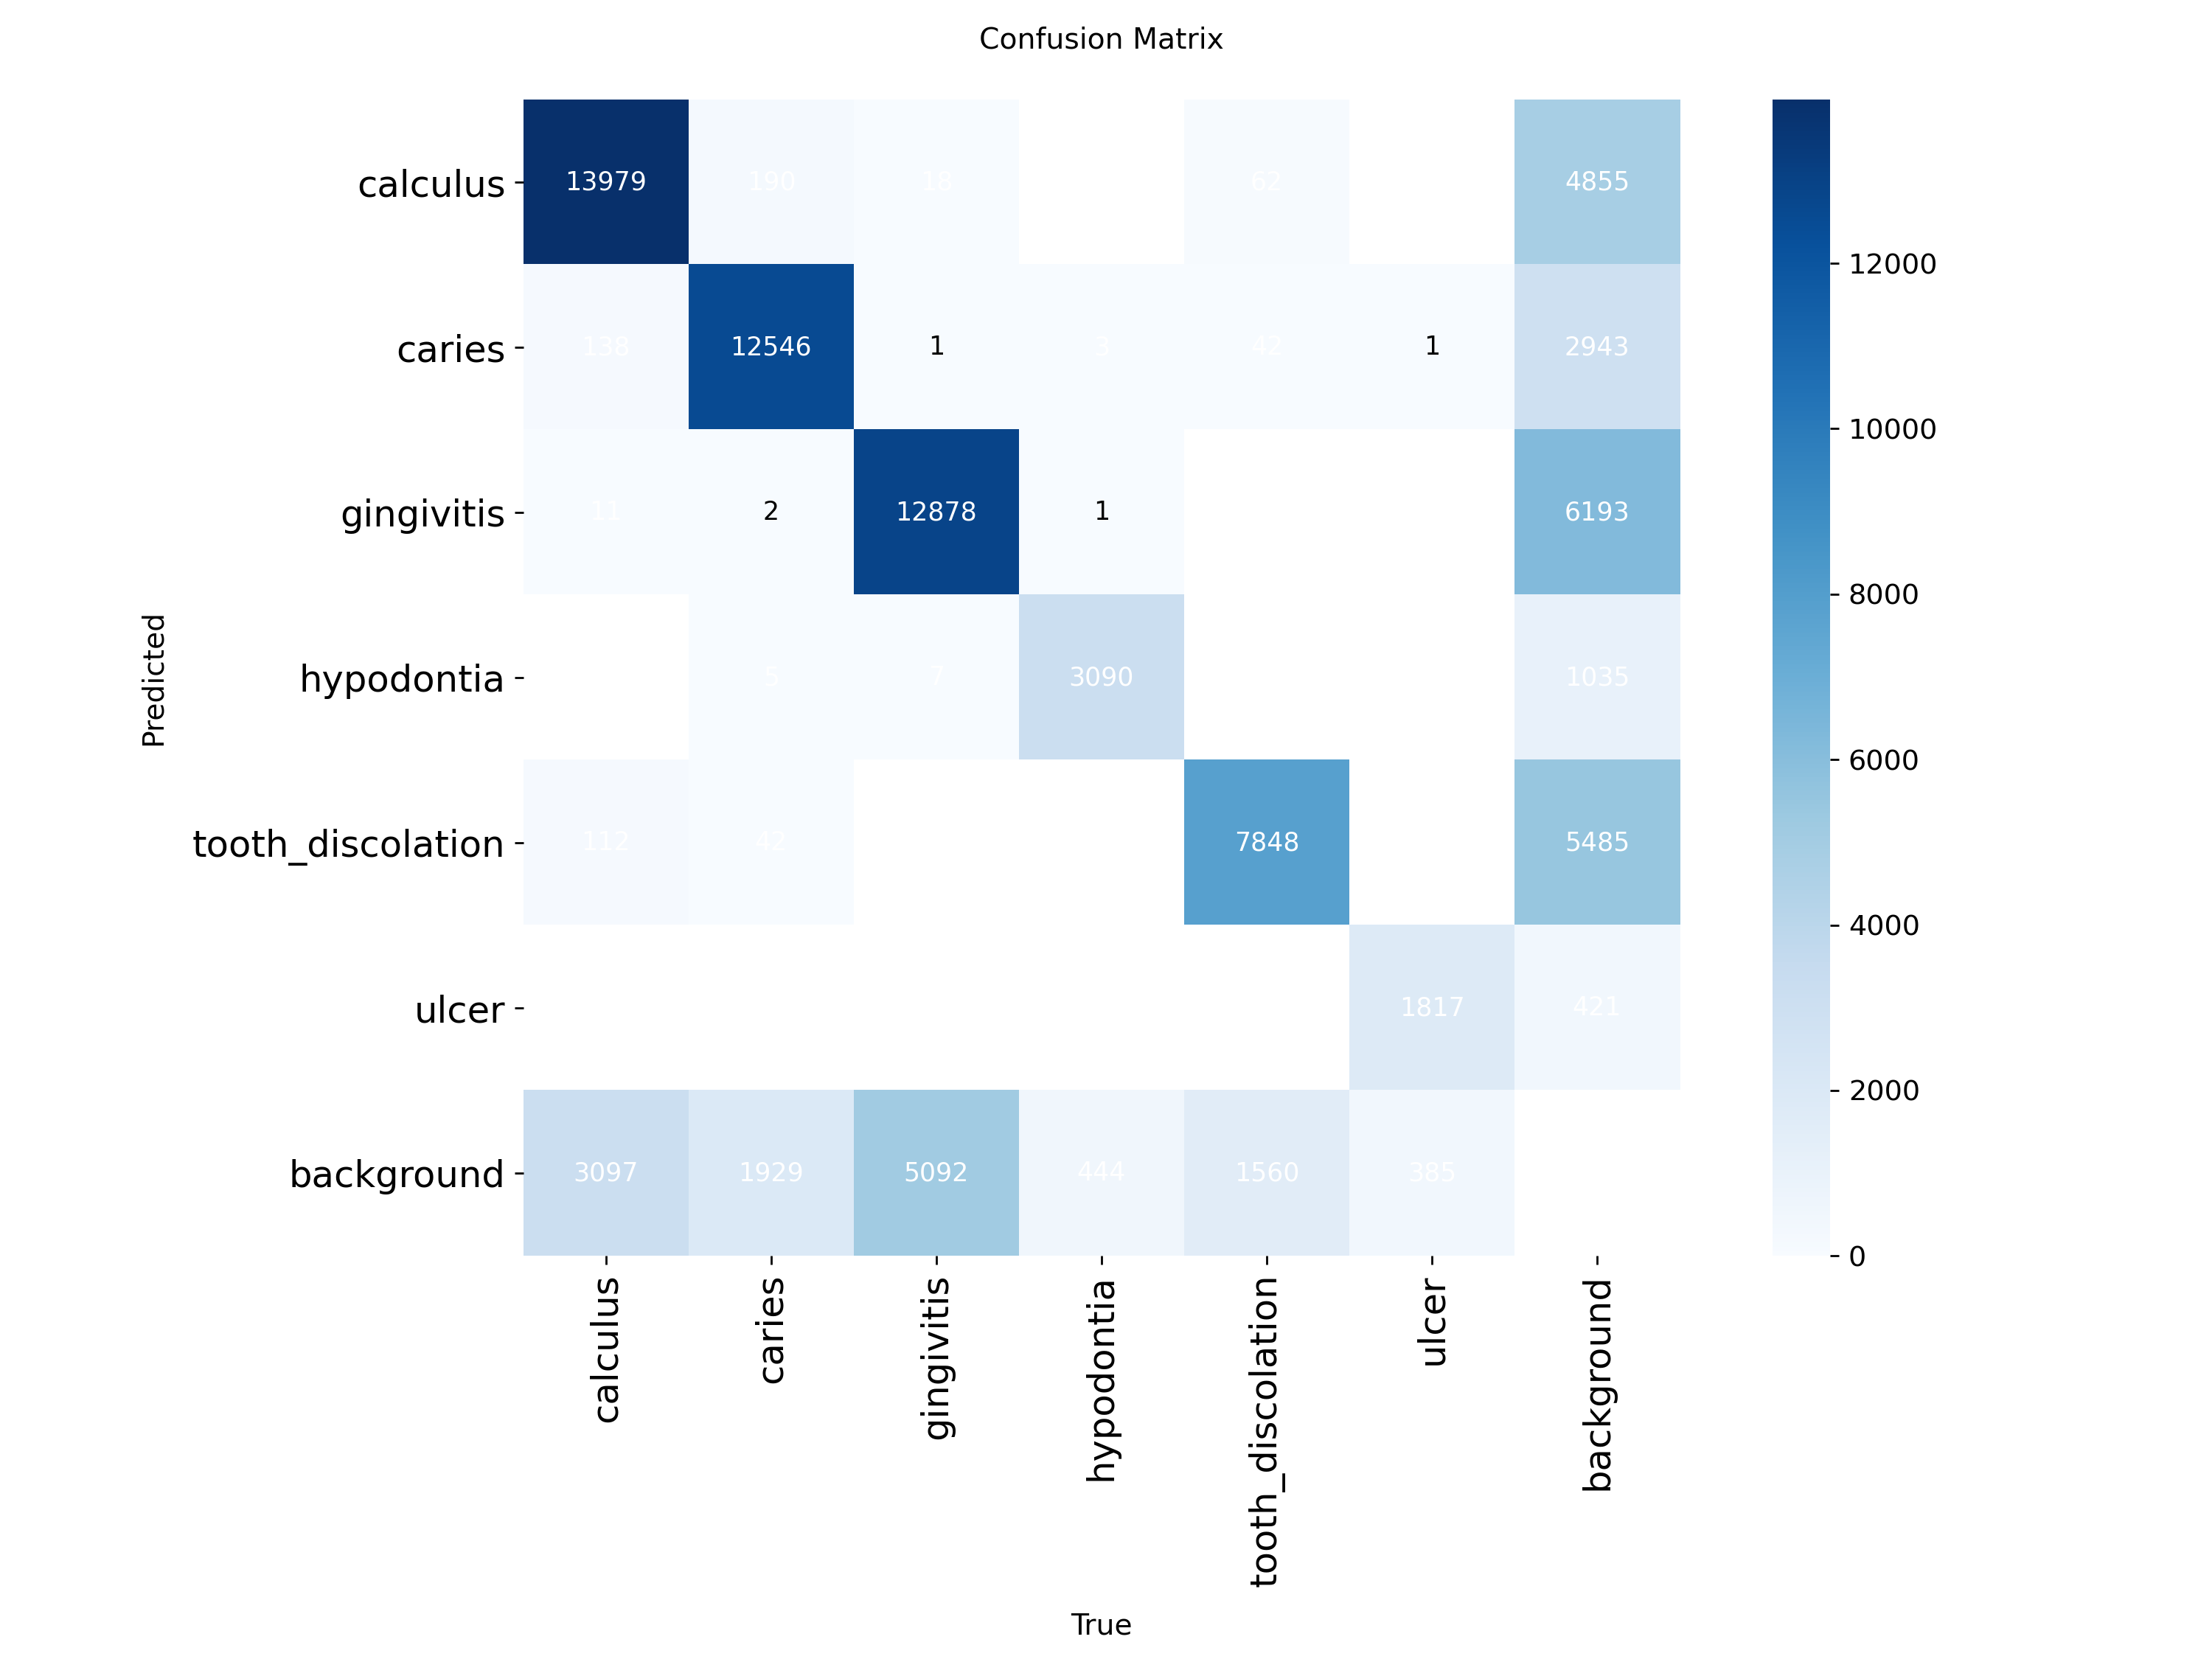

📊 Displaying: PR_curve.png


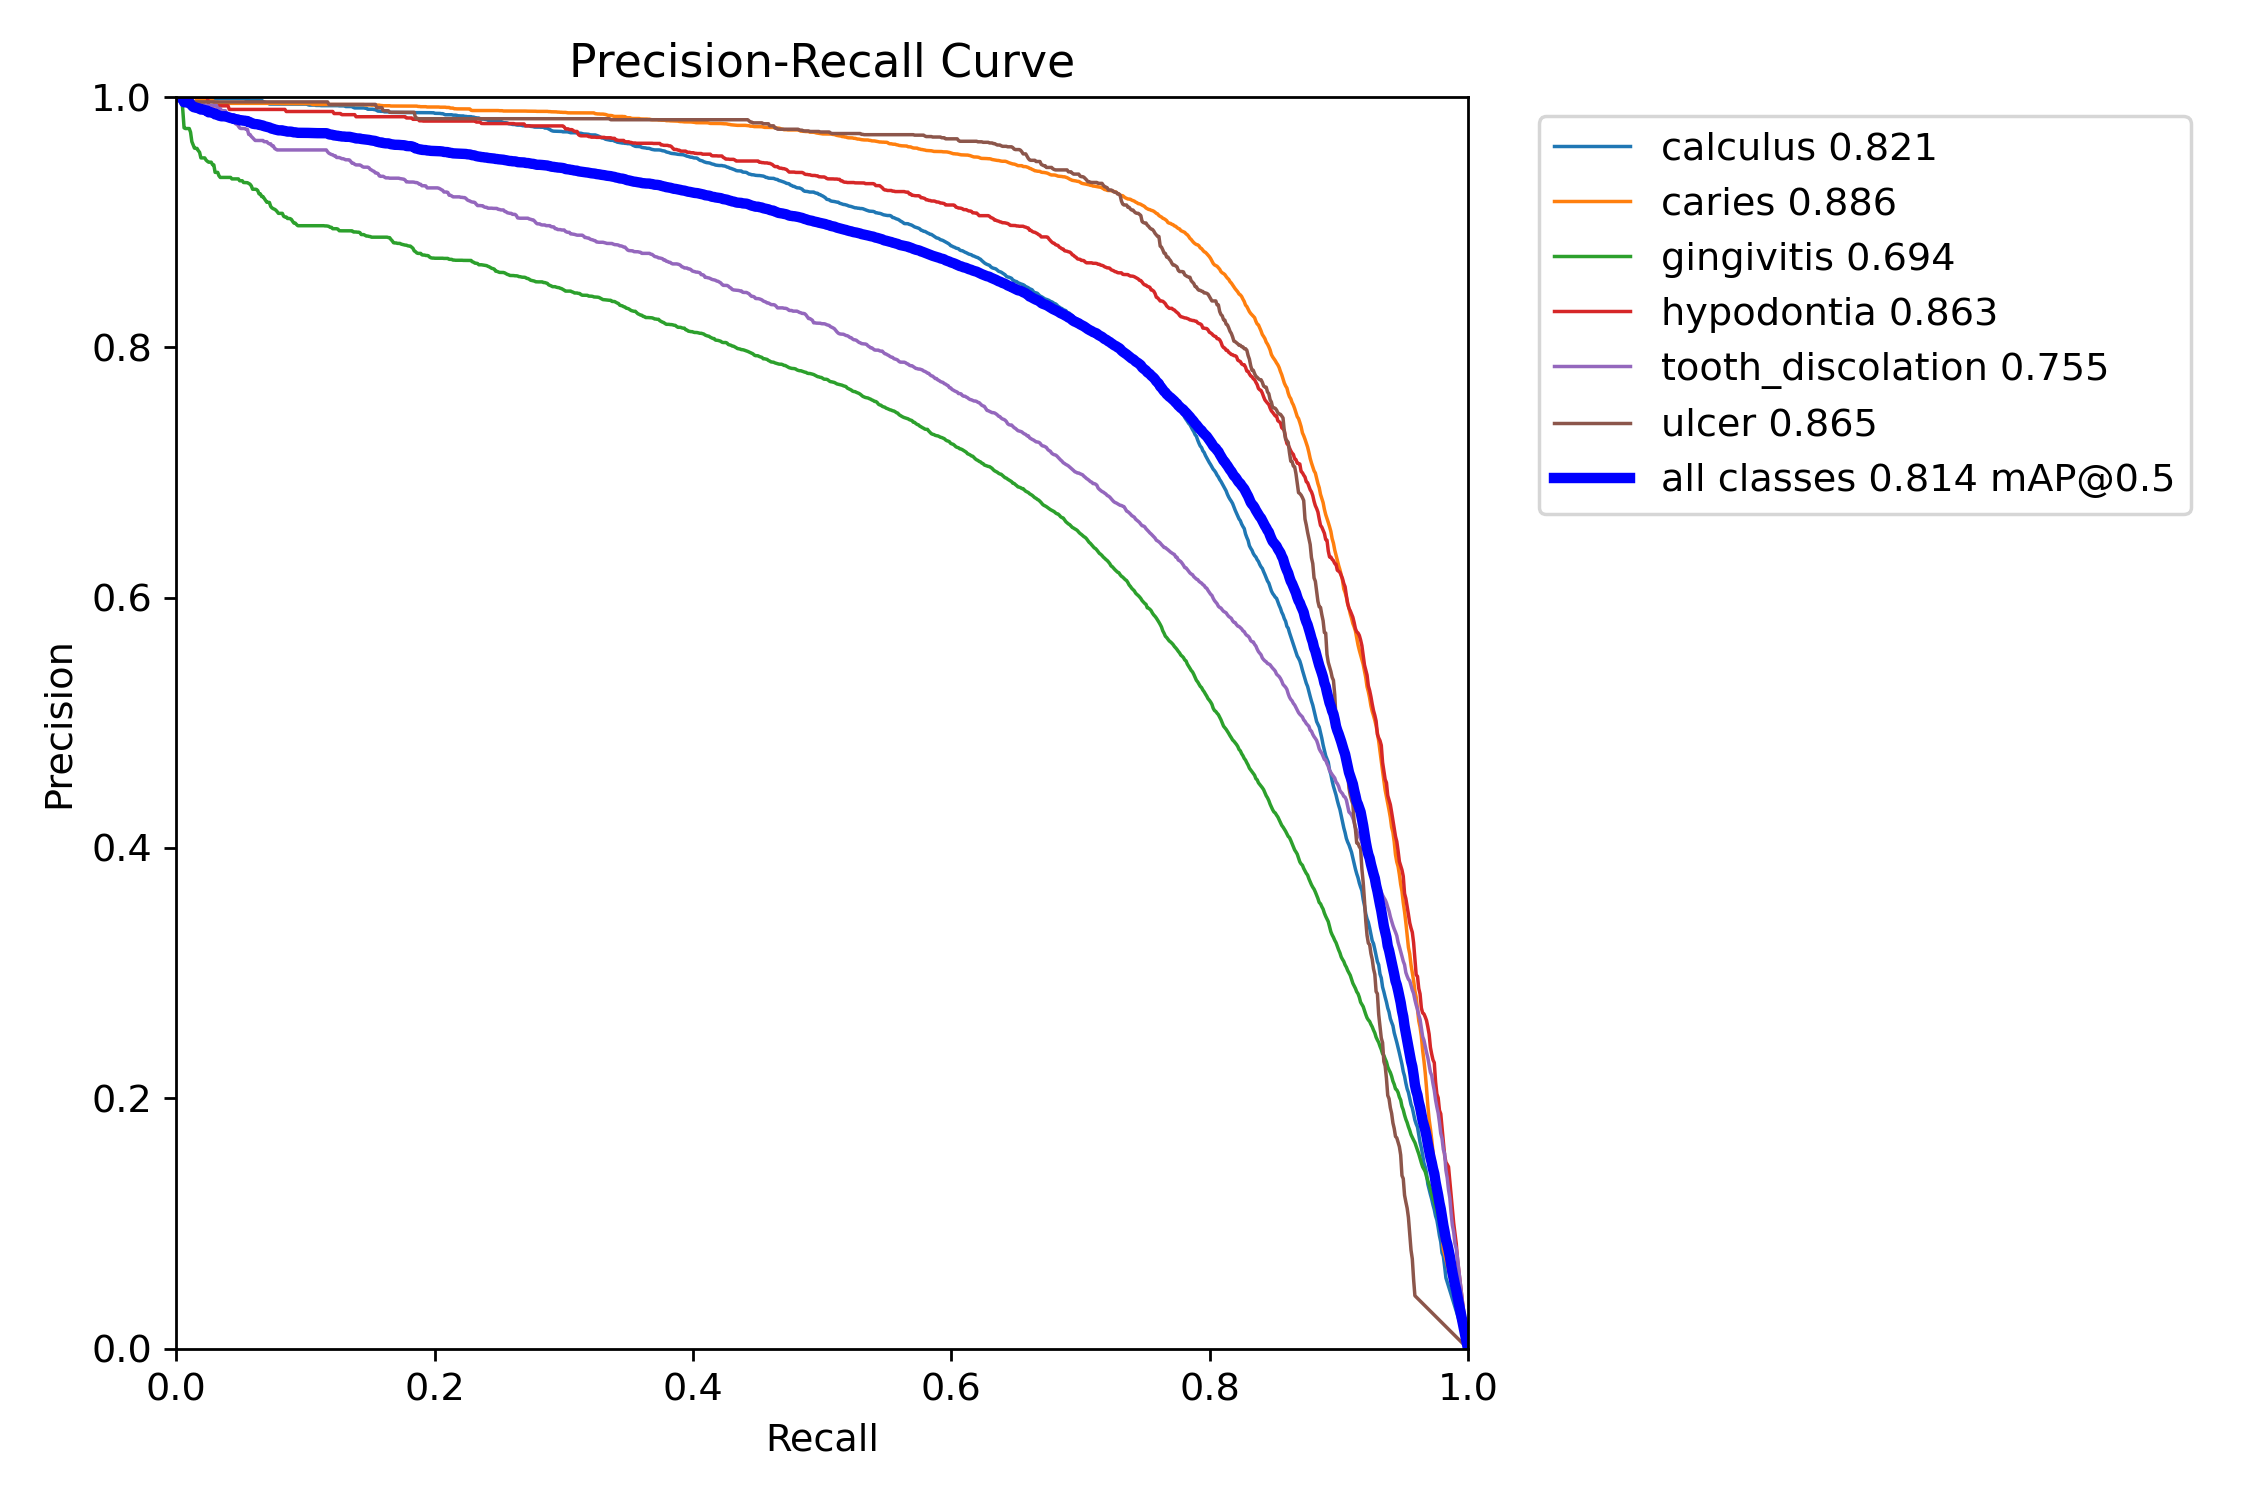

📊 Displaying: F1_curve.png


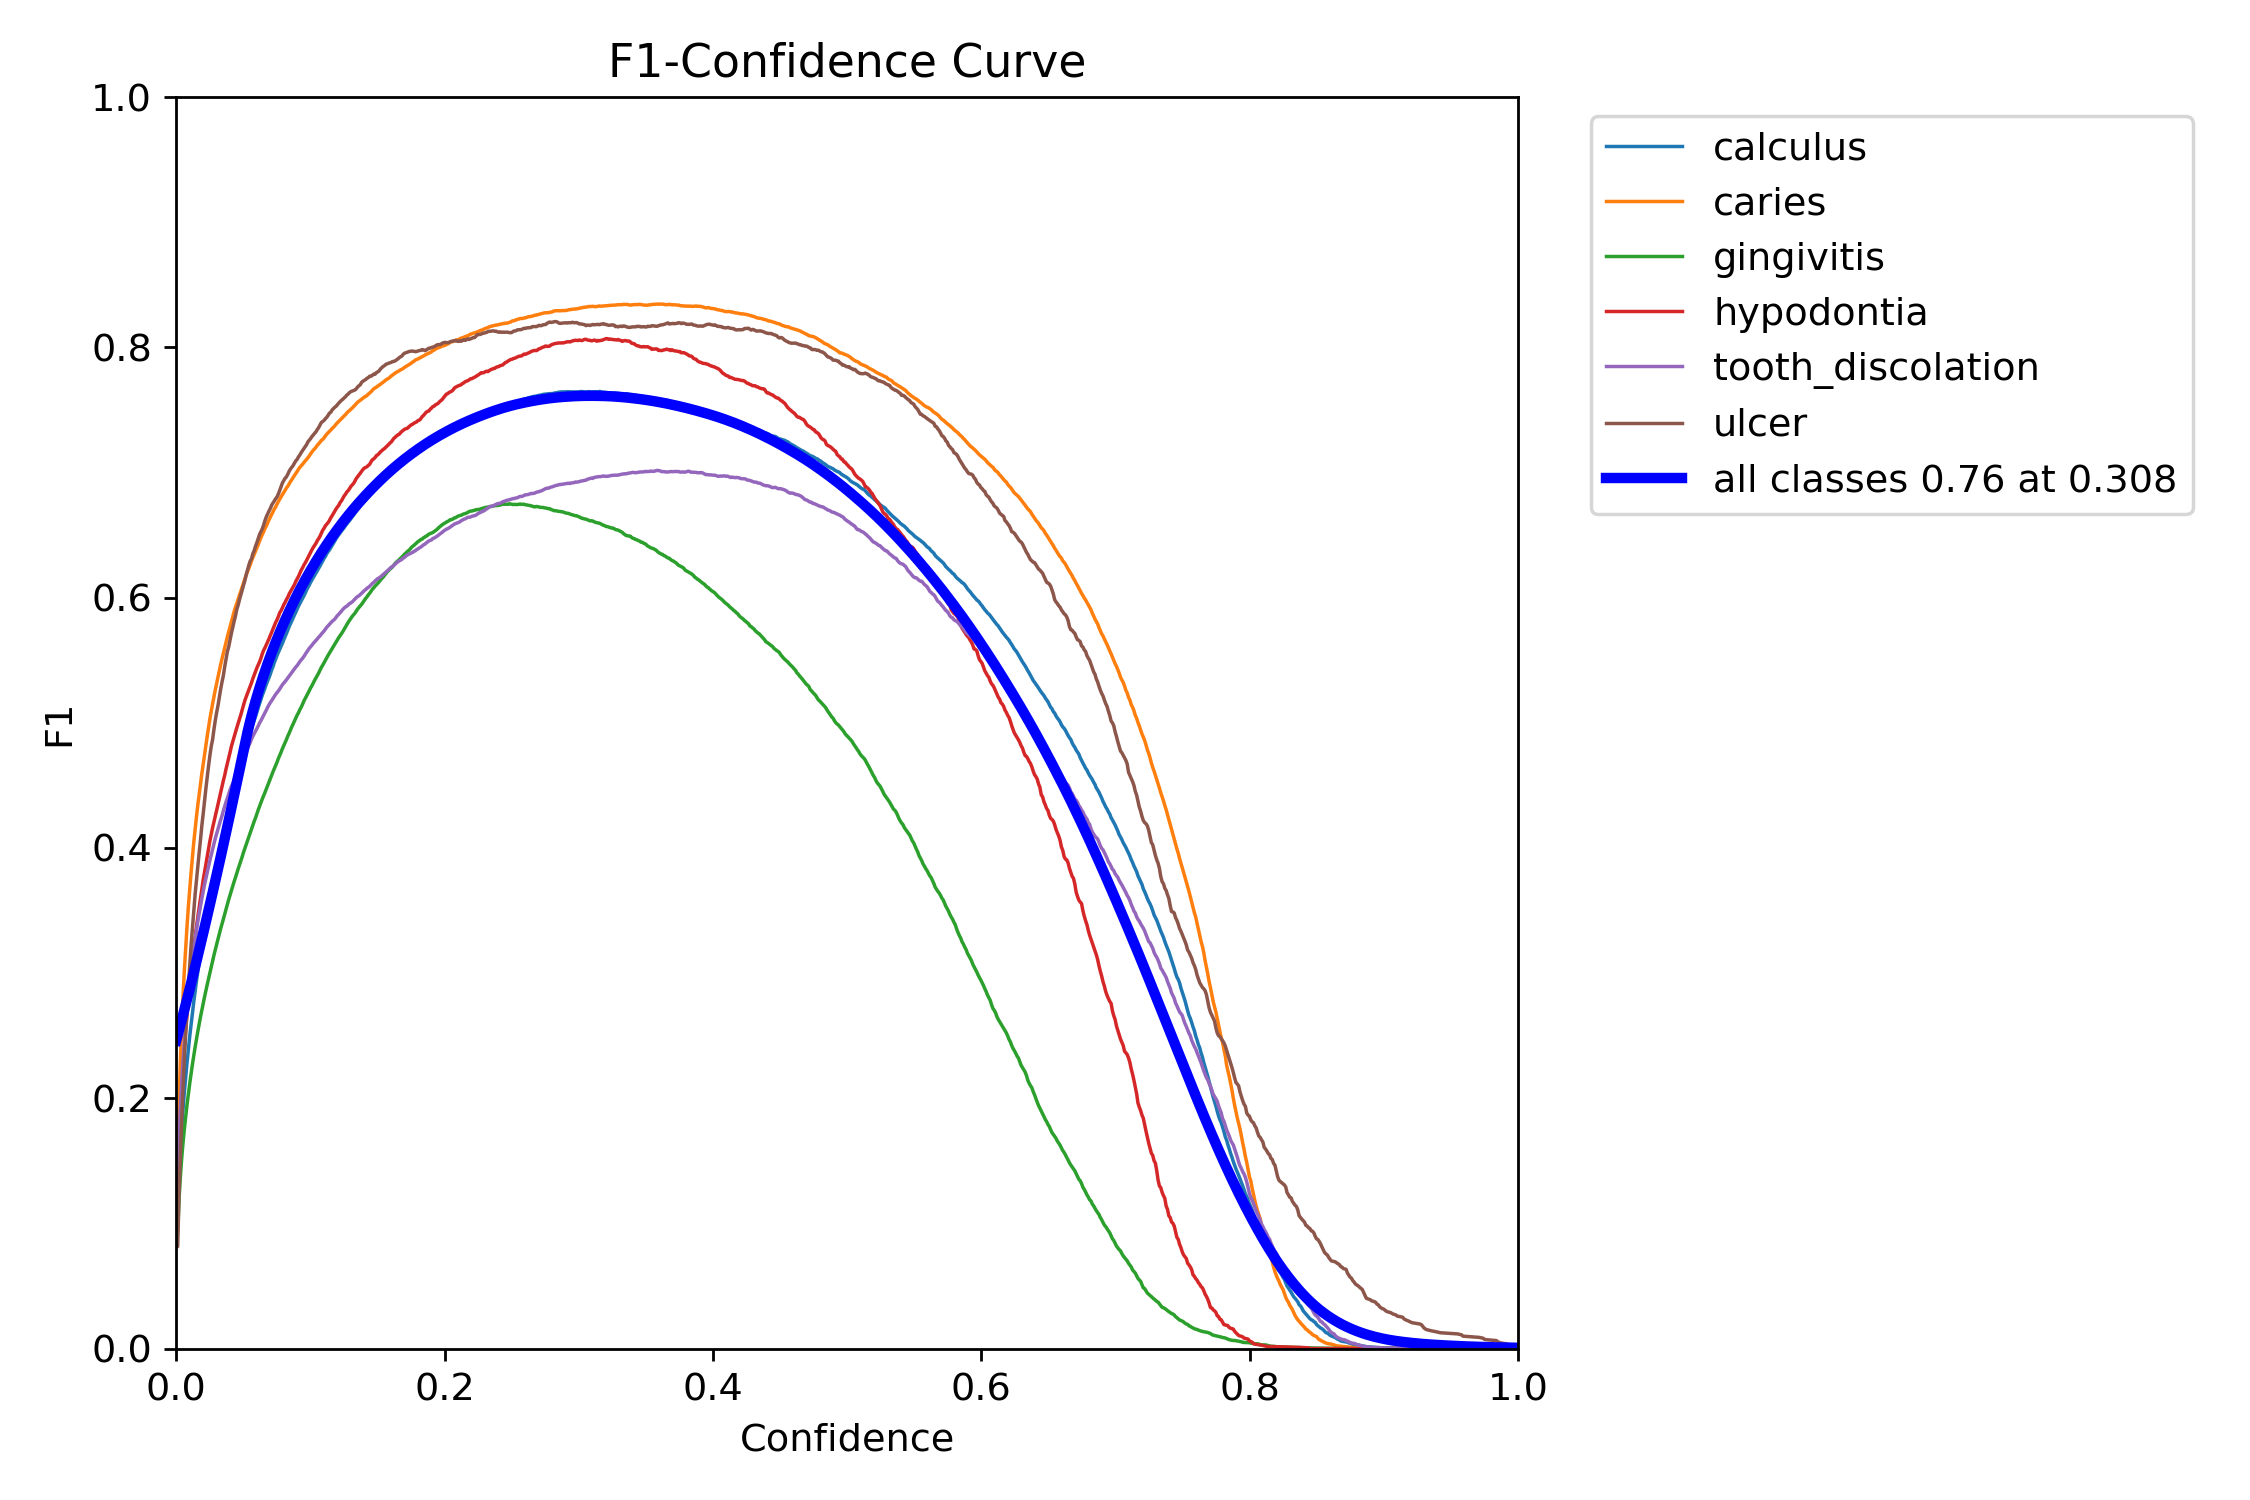

📊 Displaying: P_curve.png


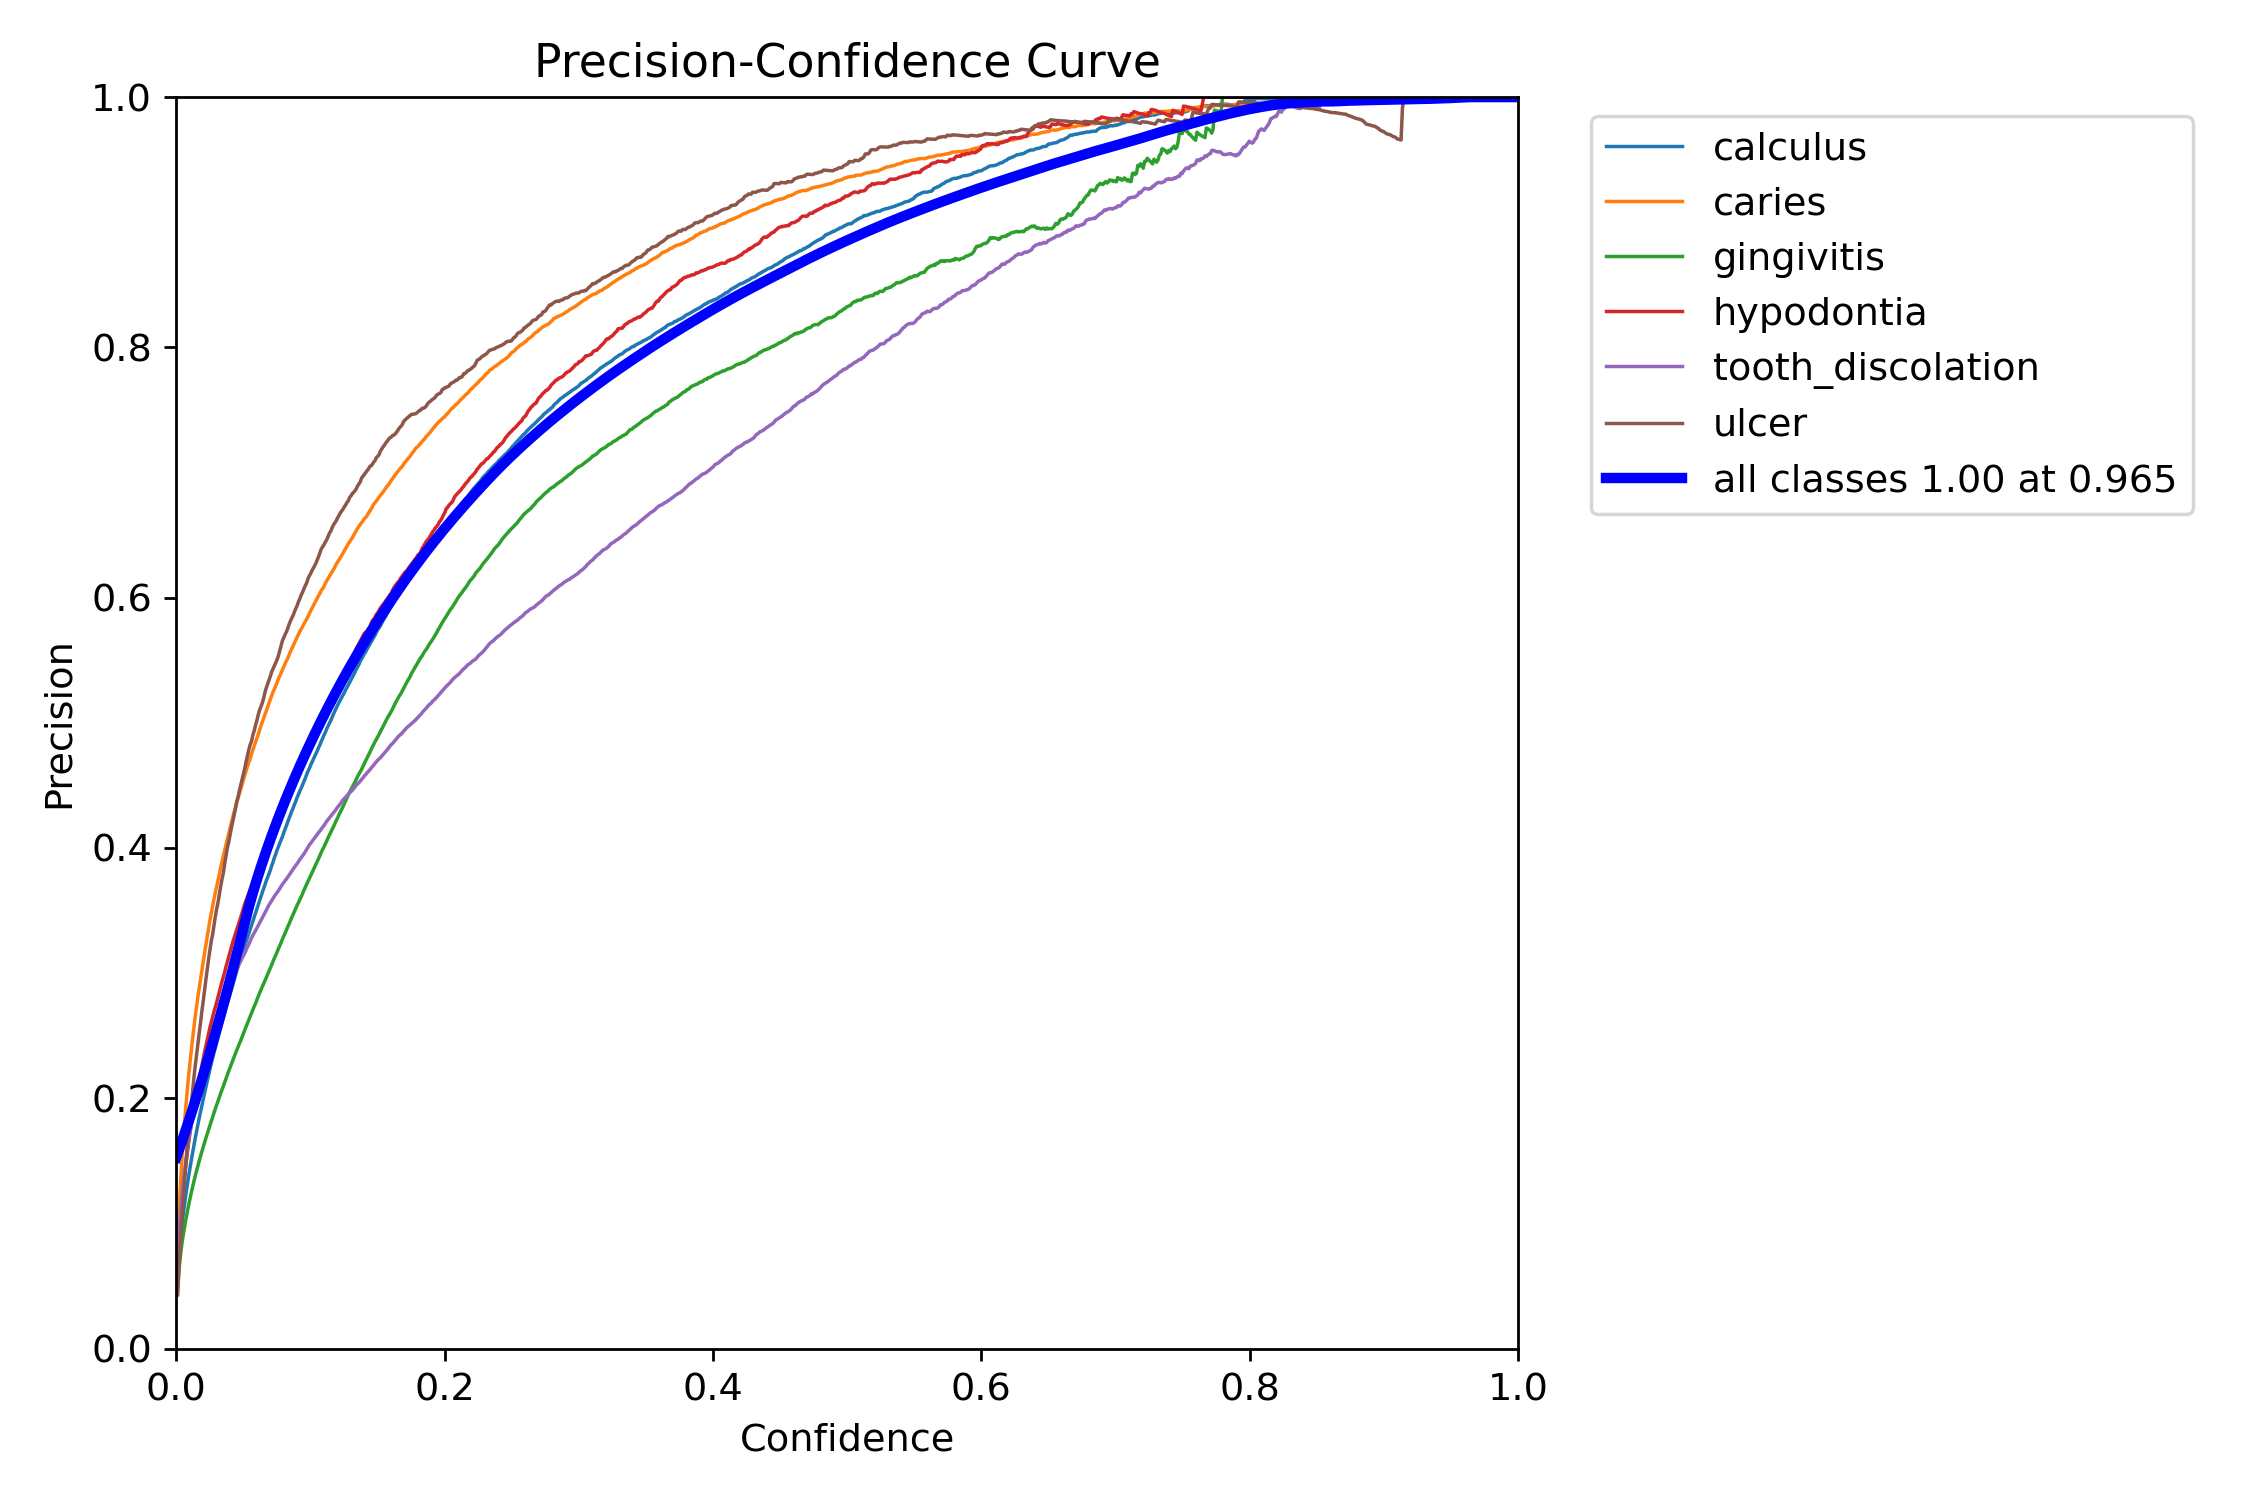

📊 Displaying: R_curve.png


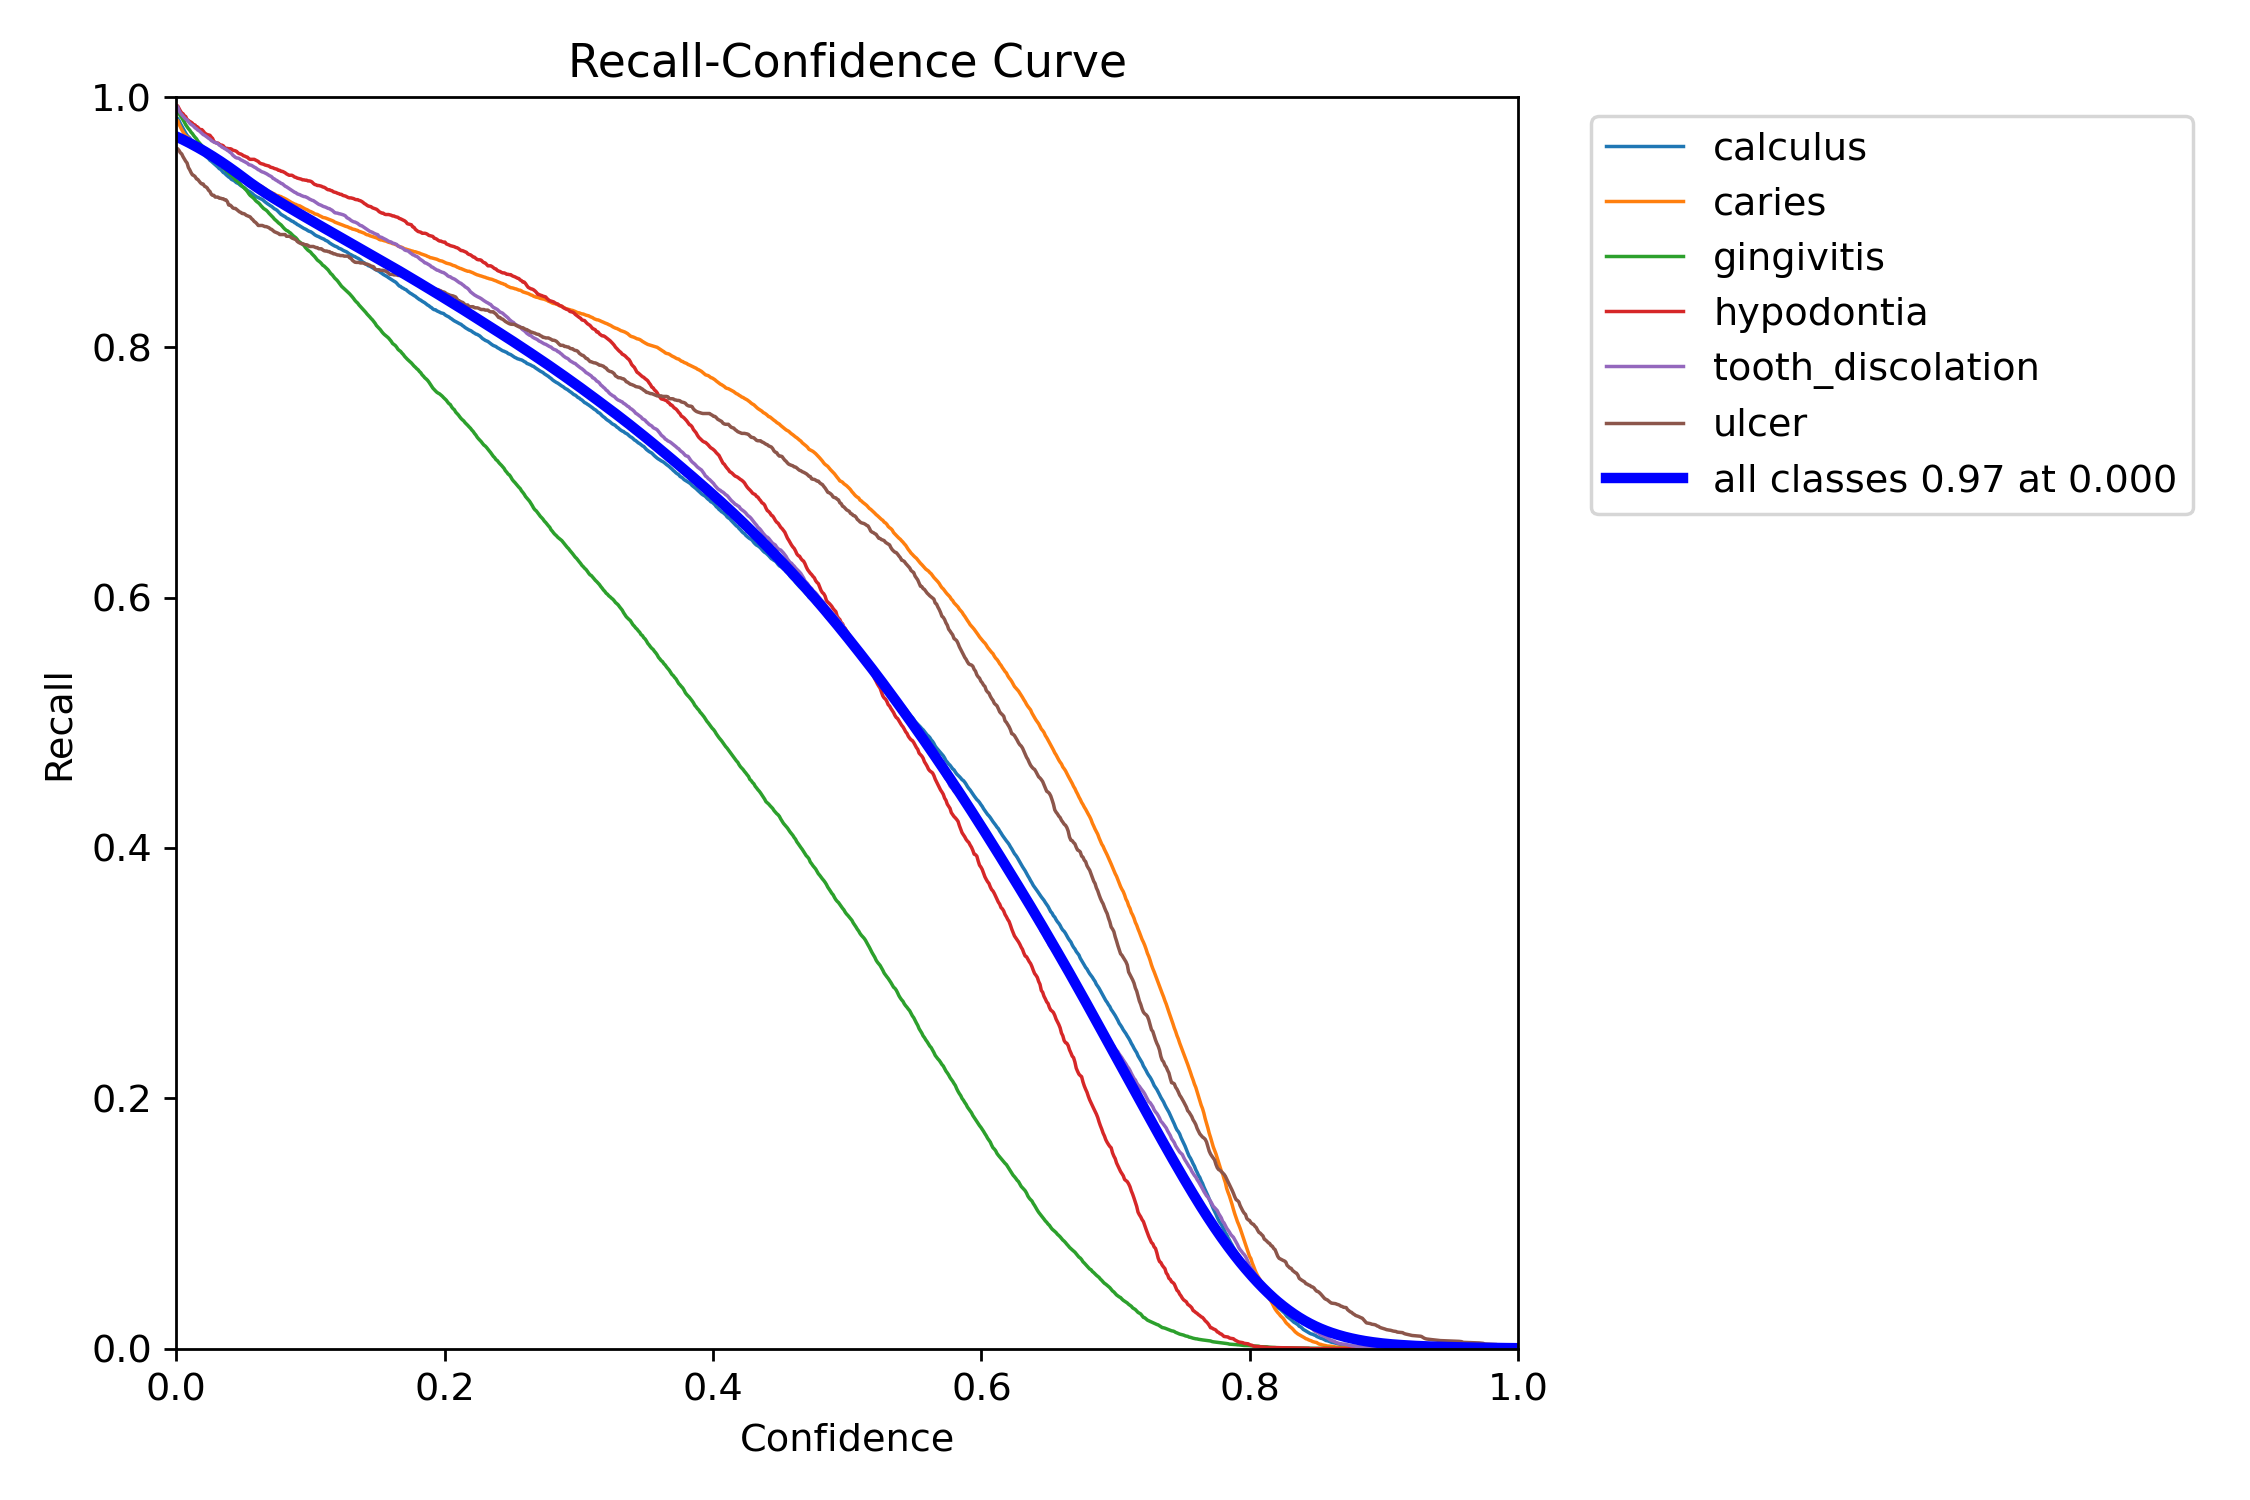

❌ Not found: val_batch0.jpg


In [8]:
from IPython.display import Image, display
import os

val_path = 'runs/detect/val19'

image_files = [
    "confusion_matrix.png",
    "PR_curve.png",
    "F1_curve.png",
    "P_curve.png",
    "R_curve.png",
    "val_batch0.jpg"
]

for img in image_files:
    full_path = os.path.join(val_path, img)
    if os.path.exists(full_path):
        print(f"📊 Displaying: {img}")
        display(Image(filename=full_path))
    else:
        print(f"❌ Not found: {img}")


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Replace these with your real ground truth and predicted labels
y_true = [...]  # List of true labels
y_pred = [...]  # List of predicted labels

# Class labels (must match the order in predictions)
class_names = ['calculus', 'caries', 'gingivitis', 'hypodontia', 'tooth_discolation', 'ulcer', 'background']

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=class_names)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt='g',
    cmap='viridis',  # Try 'plasma', 'magma', 'YlGnBu', etc.
    xticklabels=class_names,
    yticklabels=class_names,
    linewidths=0.5,
    linecolor='black',
    cbar_kws={'label': 'Count'}
)

plt.title("Confusion Matrix (Custom Colors)")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'sklearn'

In [20]:

!pip install sklearn


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [14]:

image_path = r"C:\Users\huyas\oral-diseases-2\valid\images\caries-829-_jpeg.rf.0cb7b2873dec76f19b210458a6aedf07.jpg"
results = model.predict(image_path)

# Show the results (this will display the image with predictions)
results[0].show()



image 1/1 C:\Users\huyas\oral-diseases-2\valid\images\caries-829-_jpeg.rf.0cb7b2873dec76f19b210458a6aedf07.jpg: 320x320 5 calculuss, 3 tooth_discolations, 158.1ms
Speed: 1.4ms preprocess, 158.1ms inference, 5.8ms postprocess per image at shape (1, 3, 320, 320)


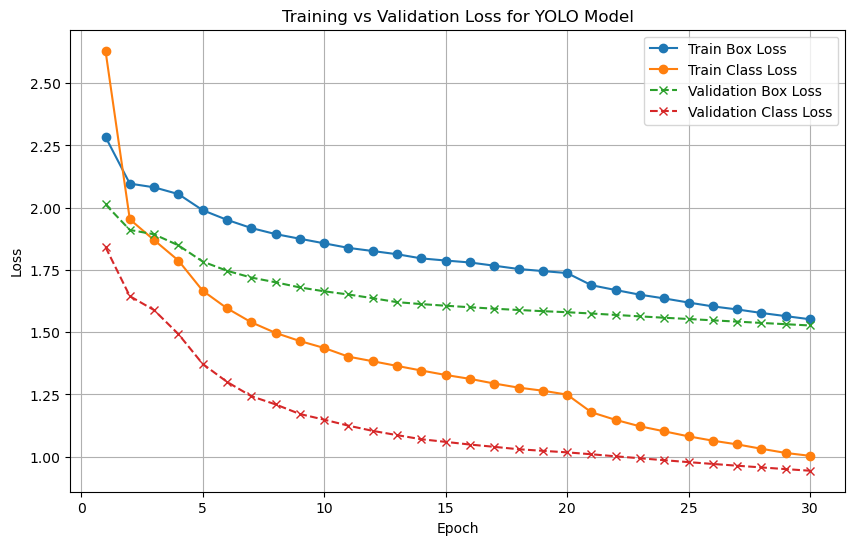

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the results CSV file is stored in the same directory as the best model weights
log_path = r'runs/detect/train12/results.csv'  # Update the path if stored differently
df = pd.read_csv(log_path)

# Plotting training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss', marker='o')
plt.plot(df['epoch'], df['train/cls_loss'], label='Train Class Loss', marker='o')
plt.plot(df['epoch'], df['val/box_loss'], label='Validation Box Loss', linestyle='dashed', marker='x')
plt.plot(df['epoch'], df['val/cls_loss'], label='Validation Class Loss', linestyle='dashed', marker='x')
plt.title('Training vs Validation Loss for YOLO Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import onnx
from onnx_tf.backend import prepare

# Load ONNX model from Windows path
onnx_model = onnx.load(r"C:\Users\huyas\Downloads\best.onnx")




In [ ]:
# Convert to TensorFlow SavedModel
tf_rep = prepare(onnx_model)
tf_rep.export_graph("tf_model")

print("✅ Exported to TensorFlow at 'tf_model/'")